### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from textblob import TextBlob
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\DELL8\\OneDrive\\\Desktop\\Womens Clothing E-Commerce Reviews.csv")
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


#### **Dataset Overview**
The dataset contains **23,486** entries and **11** columns. It consists of customer reviews for women's clothing sold on an e-commerce platform. Each review includes metadata such as product category, rating, and customer feedback.

#### **Column Descriptions:**
1. **Unnamed: 0** - Index column (not necessary for analysis).
2. **Clothing ID** - A unique identifier for each clothing item.
3. **Age** - Age of the reviewer.
4. **Title** - Short title or summary of the review (contains missing values).
5. **Review Text** - Full review provided by the customer (contains missing values).
6. **Rating** - A numerical rating (1 to 5) given by the customer.
7. **Recommended IND** - A binary value indicating if the customer recommends the product (1 = Yes, 0 = No).
8. **Positive Feedback Count** - The number of customers who found the review helpful.
9. **Division Name** - High-level division of the product category (e.g., "General", "Initmates").
10. **Department Name** - Department to which the product belongs (e.g., "Dresses", "Tops").
11. **Class Name** - Specific clothing category within the department (e.g., "Blouses", "Pants").

#### **Missing Values:**
- **Title** and **Review Text** contain missing values.
- **Division Name, Department Name, and Class Name** have a few missing entries.


In [3]:
df1 = df.groupby('Clothing ID').mean(numeric_only=True)
df1


,Unnamed: 0,Age,Rating,Recommended IND,Positive Feedback Count
Clothing ID,,,,,
0,14746.000000,26.000000,5.000000,1.000000,0.000000
1,22744.666667,36.666667,4.000000,0.666667,0.333333
2,876.000000,28.000000,4.000000,1.000000,0.000000
3,16384.000000,36.000000,5.000000,1.000000,0.000000
4,29.000000,28.000000,5.000000,1.000000,0.000000
...,...,...,...,...,...
1201,1572.000000,36.500000,4.000000,1.000000,0.000000
1202,6229.333333,42.000000,4.333333,1.000000,0.444444
1203,21905.636364,38.000000,4.545455,0.818182,0.181818


In [4]:
len(df1[df1.Rating>3])


1048

In [5]:
df['Review Text'] = df['Review Text'].fillna('')

### Find Sentiment on Text(Reviews)

In [6]:

def sentiment_calc(text):
    return TextBlob(text).sentiment.polarity 
df['Sentiment'] = df['Review Text'].apply(sentiment_calc)
df


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Sentiment
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.633333
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.339583
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.073675
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.550000
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.512891
...,...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,0.552667
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,0.091667
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,0.414286
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,0.322222


### Apply Multiplication B/W Rating&Sentiment

In [7]:
df['Updated_score'] = df['Rating']*df['Sentiment']
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Sentiment,Updated_score
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.633333,2.533333
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.339583,1.697917
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.073675,0.221025
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.550000,2.750000
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.512891,2.564453
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,0.552667,2.763333
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,0.091667,0.275000
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,0.414286,1.242857
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,0.322222,0.966667


### Make Unnamed into Normal Form

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
df.columns = df.columns.str.strip() 
unnamed_cols = [col for col in df.columns if "Unnamed" in col]
if unnamed_cols:
    le = LabelEncoder()
    for col in unnamed_cols:
        df[col] = le.fit_transform(df[col].astype(str))  

# Display the first few rows
df.head()


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Sentiment,Updated_score
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.633333,2.533333
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.339583,1.697917
2,11112,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.073675,0.221025
3,15709,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.550000,2.750000
4,16820,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.512891,2.564453


### Average Sentiment by Rating"

C:\Users\DELL8\AppData\Local\Temp\ipykernel_48468\1563203474.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_sentiment.index, y=avg_sentiment.values, palette="coolwarm")


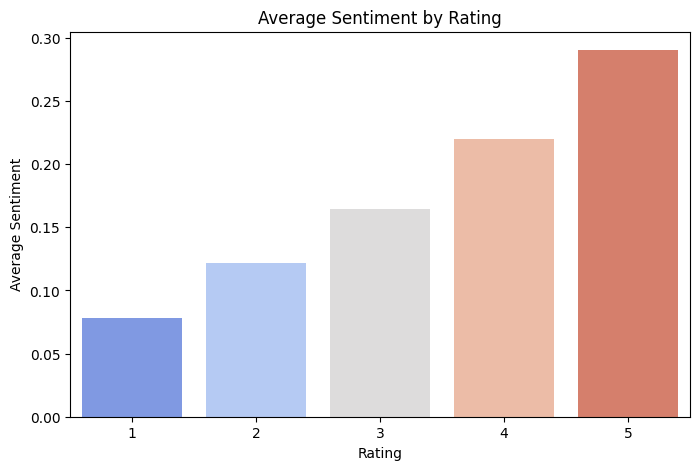

In [9]:
plt.figure(figsize=(8, 5))
avg_sentiment = df.groupby("Rating")["Sentiment"].mean()
sns.barplot(x=avg_sentiment.index, y=avg_sentiment.values, palette="coolwarm")
plt.xlabel("Rating")
plt.ylabel("Average Sentiment")
plt.title("Average Sentiment by Rating")
plt.show()

### **Observation:**  
The bar chart visualizes the **average sentiment score** for each **rating (1 to 5)**. The x-axis represents the **customer ratings**, while the y-axis shows the **average sentiment score** associated with each rating. The **color gradient (coolwarm palette)** helps distinguish variations in sentiment across different rating levels.

### **Conclusion:**  
If the average sentiment score **increases with higher ratings**, it confirms a strong correlation between sentiment polarity and customer ratings. A **low average sentiment for lower ratings (1-2)** indicates dissatisfaction, while a **high sentiment for ratings 4-5** reflects positive experiences. If there are inconsistencies (e.g., a lower sentiment for a high rating), it may suggest **issues like misleading reviews or mixed feedback**. This analysis helps in understanding how sentiment aligns with ratings, providing insights into customer satisfaction levels.

### Distribution of Sentiment Scores

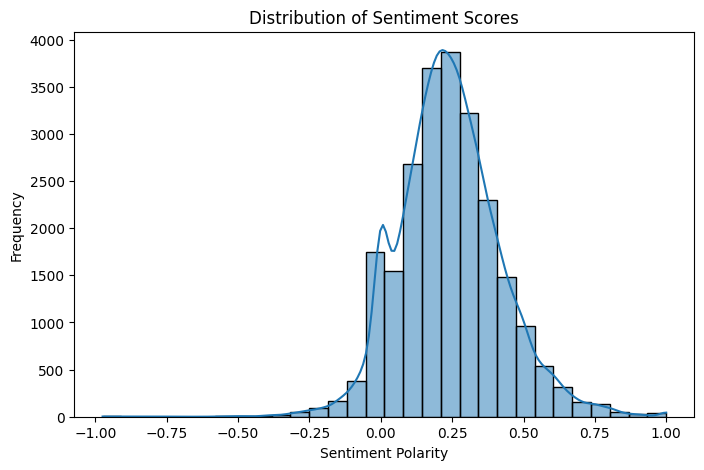

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Sentiment"], bins=30, kde=True)
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.title("Distribution of Sentiment Scores")
plt.show()

### **Observation:**  
The histogram visualizes the **distribution of sentiment scores** in the dataset. The x-axis represents the **sentiment polarity**, ranging from negative (left) to positive (right), while the y-axis shows the **frequency** of reviews for each sentiment score range. The **Kernel Density Estimate (KDE) curve** overlays the histogram to highlight the overall trend of sentiment distribution.

### **Conclusion:**  
If the histogram is **skewed towards the positive side**, it suggests that most reviews are favorable. A **balanced distribution** indicates a mix of positive, neutral, and negative reviews. If there is a **significant concentration of negative sentiment**, it highlights potential customer dissatisfaction. This visualization helps in understanding overall customer sentiment trends and identifying areas for improvement.

### Sentiment Distribution

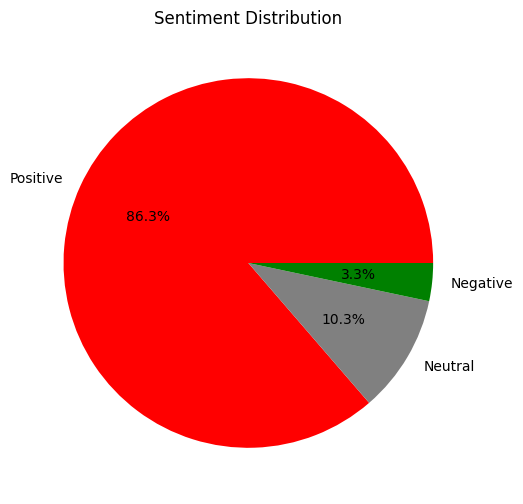

In [11]:
sentiment_counts = pd.cut(df["Sentiment"], bins=[-1, -0.05, 0.05, 1], labels=["Negative", "Neutral", "Positive"]).value_counts()
plt.figure(figsize=(6, 6))
sentiment_counts.plot(kind="pie", autopct="%1.1f%%", colors=["red", "gray", "green"])
plt.title("Sentiment Distribution")
plt.ylabel("")  # Hide y-label for a clean look
plt.show()


### **Observation:**  
The pie chart categorizes customer reviews into three sentiment groups: **Negative, Neutral, and Positive**, based on sentiment scores. The **size of each segment** represents the proportion of reviews in that category. The colors **red, gray, and green** are used to visually differentiate between negative, neutral, and positive sentiments, respectively. This visualization provides a quick overview of customer feedback distribution.

### **Conclusion:**  
If the **positive sentiment** segment is the largest, it suggests that most customers are satisfied with their purchases. A significant **negative sentiment** portion indicates recurring complaints or dissatisfaction. A high **neutral sentiment** percentage may suggest mixed opinions or vague reviews. This analysis helps businesses understand customer perception, identify improvement areas, and enhance product quality to increase customer satisfaction.

### Word Cloud of Positive Reviews

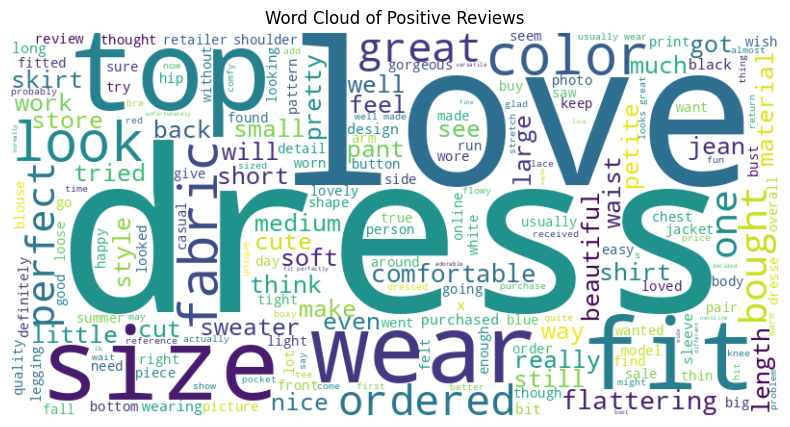

In [12]:
from wordcloud import WordCloud

positive_reviews = " ".join(df[df["Sentiment"] > 0]["Review Text"].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(positive_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Positive Reviews")
plt.show()


### **Observation:**  
The code generates a **word cloud** from positive reviews by filtering the dataset based on the `"Sentiment"` column (where values are greater than 0). It combines all positive reviews into a single text and visualizes the most frequently occurring words. The **word cloud helps identify key themes** in customer satisfaction, showing common praises and appreciated aspects of the products.

### **Conclusion:**  
The visualization reveals **positive sentiments** expressed by customers. Frequently occurring words such as **"comfortable," "love," "fit," "beautiful," "perfect," and "great"** suggest that customers are generally happy with the product’s comfort, design, and fit. This insight can help businesses understand their strengths and focus on maintaining product quality and customer satisfaction.

### Word Cloud of Negative Reviews

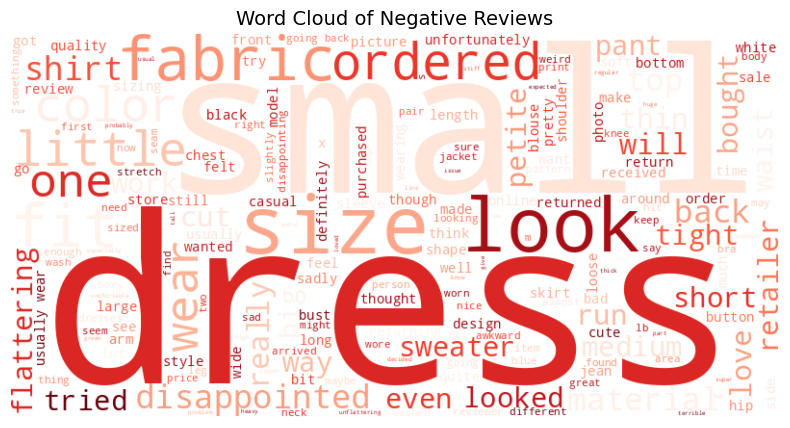

In [13]:
negative_reviews = " ".join(df[df["Sentiment"] < 0]["Review Text"].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="Reds").generate(negative_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Negative Reviews", fontsize=14)
plt.show()


### **Observation:**
The given code generates a **word cloud** for negative reviews by filtering the dataset based on the `"Sentiment"` column (where values are less than 0). It then combines all the negative review texts into a single string and visualizes the most frequently used words. The word cloud uses **red shades** to highlight common words, making it easier to identify recurring themes in negative feedback. The visualization helps to recognize common complaints, product issues, or dissatisfaction factors mentioned by customers.

### **Conclusion:**
From the word cloud, we can infer **key pain points** that customers face with women's clothing products. If certain words like **"poor," "small," "uncomfortable," "return," or "cheap"** appear frequently, it suggests common concerns related to product quality, sizing issues, or overall dissatisfaction. This insight can help businesses improve their products, address customer concerns, and enhance customer satisfaction by focusing on resolving the most mentioned problems.

### Make function for classify updated_score

In [14]:
classify = {'1':[-5,-4,-3.75,-3.25,3,-2.75,-2.50,-2.25,-2,-1.5,-1.25,-1,-0.75,-0.5,-0.25],
            '2':[-0.24,0.25,0.5,0.75,1] ,
            '3': [1.01,1.25,1.5,1.75,2],
            '4': [2.01,2.25,2.5,2.75,3],
            '5':[3.01,3.25,3.50,3.75,4,5]}

def fun(values):
    for i in classify:
        for j in classify[i]:
            if values == j:
                return i
            if values <= j:
                return i

### Apply function on updated_score and put into New_score column

In [15]:
df['New_score'] = df['Updated_score'].apply(fun)
df['New_score'] = pd.to_numeric(df['New_score'])
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Sentiment,Updated_score,New_score
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.633333,2.533333,1
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.339583,1.697917,1
2,11112,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.073675,0.221025,1
3,15709,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.550000,2.750000,1
4,16820,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.512891,2.564453,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,14982,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,0.552667,2.763333,1
23482,14983,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,0.091667,0.275000,1
23483,14984,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,0.414286,1.242857,1
23484,14985,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,0.322222,0.966667,1


### Pivot table of ClothingID, Unnamed and New_score

In [92]:
df_pivot = df.pivot_table(index='Clothing ID', columns='Age', values='New_score').fillna(0)
df_pivot

Age,18,19,20,21,22,23,24,25,26,27,...,85,86,87,89,90,91,92,93,94,99
Clothing ID,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Sparse Matrix (Compressed Sparse Row)

In [93]:
from scipy.sparse import csr_matrix

df_pivot_matrix = csr_matrix(df_pivot.values) 
print(df_pivot_matrix)

  (0, 8)	1.0
  (1, 6)	1.0
  (1, 18)	1.0
  (1, 32)	1.0
  (2, 10)	1.0
  (3, 18)	1.0
  (4, 10)	1.0
  (5, 21)	1.0
  (6, 21)	1.0
  (7, 21)	1.0
  (8, 15)	1.0
  (8, 18)	1.0
  (8, 20)	1.0
  (8, 24)	1.0
  (8, 39)	1.0
  (8, 52)	1.0
  (9, 16)	1.0
  (10, 20)	1.0
  (11, 28)	1.0
  (12, 10)	1.0
  (13, 21)	1.0
  (14, 14)	1.0
  (15, 16)	1.0
  (15, 27)	5.0
  (16, 21)	1.0
  :	:
  (1199, 13)	1.0
  (1200, 6)	1.0
  (1201, 17)	1.0
  (1201, 20)	1.0
  (1202, 10)	1.0
  (1202, 12)	1.0
  (1202, 13)	1.0
  (1202, 14)	1.0
  (1202, 26)	1.0
  (1202, 27)	1.0
  (1202, 30)	1.0
  (1202, 37)	1.0
  (1202, 47)	1.0
  (1203, 9)	1.0
  (1203, 11)	1.0
  (1203, 12)	3.0
  (1203, 16)	3.0
  (1203, 19)	1.0
  (1203, 25)	1.0
  (1203, 29)	1.0
  (1203, 35)	1.0
  (1203, 36)	1.0
  (1204, 21)	1.0
  (1205, 16)	1.0
  (1205, 51)	1.0


### Fitting data into NearestNeighborsModel

In [94]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'euclidean', n_neighbors=20, radius=1)
model_knn.fit(df_pivot_matrix)

NearestNeighbors(metric='euclidean', n_neighbors=20, radius=1)

In [95]:
print(df_pivot.var(axis=1).describe())  # Check if variance is too low


count    1206.000000
mean        0.104842
std         0.162525
min         0.012987
25%         0.012987
50%         0.025632
75%         0.094327
max         1.042379
dtype: float64


In [96]:
from sklearn.preprocessing import normalize

df_pivot_normalized = normalize(df_pivot)
similarity_matrix = cosine_similarity(df_pivot_normalized)


### Matrix of cosine similarity

In [97]:
similarity_matrix = cosine_similarity(df_pivot_normalized)
similarity_matrix

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.42426407],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.42426407, 0.        ,
        1.        ]])

In [98]:
clothing_ID = int(input('Enter clothing ID according to data set : '))
data = list(df_pivot.index) #shows list of ProductID in data-set
print(data)

Enter clothing ID according to data set :  39


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [99]:
query_index = data.index(clothing_ID) 
print(query_index)

39


In [100]:
similarity, indices = model_knn.kneighbors(df_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 8)
print(similarity) 
print(indices) 

[[0. 1. 1. 1. 1. 1. 1. 1.]]
[[39  0 17 45 51 29 43 47]]


### Rating and Review-Based Recommendation System

In [101]:
data_dict={}
for i in range(0, len(similarity.flatten())):   

    if i == 0:
        print('Recommendations for {0}:\n'.format(df_pivot.index[query_index]))
    else:
        data_dict[str(df_pivot.index[indices.flatten()[i]])] = float(similarity.flatten()[i])
        print(f'{df_pivot.index[indices.flatten()[i]]}, is similarity distance = with {similarity.flatten()[i]:.20f}')

print(data_dict)

Recommendations for 39:

0, is similarity distance = with 1.00000000000000000000
17, is similarity distance = with 1.00000000000000000000
45, is similarity distance = with 1.00000000000000000000
51, is similarity distance = with 1.00000000000000000000
29, is similarity distance = with 1.00000000000000000000
43, is similarity distance = with 1.00000000000000000000
47, is similarity distance = with 1.00000000000000000000
{'0': 1.0, '17': 1.0, '45': 1.0, '51': 1.0, '29': 1.0, '43': 1.0, '47': 1.0}


In [102]:
df['Sentiment Rating'] = np.interp(df['Sentiment'], (-1, 1), (1, 5))
df['Final Score'] = (df['Rating'] * 0.6) + (df['Sentiment Rating'] * 0.4) 

In [105]:
def categorize_rating(score):
    if score >= 4.5:
        return 5
    elif score >= 3.5:
        return 4
    elif score >= 2.5:
        return 3
    elif score >= 1.5:
        return 2
    else:
        return 1

# Apply categorization
df['Updated Rating'] = df['Final Score'].apply(categorize_rating)
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Sentiment,Updated_score,New_score,Sentiment Rating,Final Score,Updated Rating
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.633333,2.533333,1,4.266667,4.106667,4
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.339583,1.697917,1,3.679167,4.471667,4
2,11112,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.073675,0.221025,1,3.147350,3.058940,3
3,15709,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.550000,2.750000,1,4.100000,4.640000,5
4,16820,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.512891,2.564453,1,4.025781,4.610313,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,14982,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,0.552667,2.763333,1,4.105333,4.642133,5
23482,14983,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,0.091667,0.275000,1,3.183333,3.073333,3
23483,14984,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,0.414286,1.242857,1,3.828571,3.331429,3
23484,14985,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,0.322222,0.966667,1,3.644444,3.257778,3


### Difference of Rating and Updated Rating

In [104]:
df_ratings = df[['Rating', 'Sentiment', 'Sentiment Rating', 'Final Score', 'Updated Rating']]
df_ratings.head()

,Rating,Sentiment,Sentiment Rating,Final Score,Updated Rating
0,4,0.633333,4.266667,4.106667,4
1,5,0.339583,3.679167,4.471667,4
2,3,0.073675,3.147350,3.058940,3
3,5,0.550000,4.100000,4.640000,5
4,5,0.512891,4.025781,4.610313,5


### Pivot table of Recommended IND,Class Name and final_score

In [54]:
df_pivot_de = df[df['Class Name'].notnull()].pivot_table(
    index='Class Name',
    columns='Recommended IND',
    values='Final Score'
).fillna(0)
df_pivot_de

Recommended IND,0,1
Class Name,,
Blouses,2.689562,4.168506
Casual bottoms,0.000000,4.032000
Chemises,0.000000,4.080000
Dresses,2.711474,4.163458
Fine gauge,2.684970,4.191555
Intimates,2.507535,4.212605
Jackets,2.528004,4.231141
Jeans,2.621548,4.196934
Knits,2.679419,4.158506


In [55]:
df_pivot_normalized = normalize(df_pivot_de)

### Convert the normalized pivot data into a sparse matrix for efficiency.

In [56]:
df_pivot_matrix = csr_matrix(df_pivot_normalized)

In [57]:
model_knn = NearestNeighbors(metric='euclidean', n_neighbors=20, radius=1)
model_knn.fit(df_pivot_matrix)

NearestNeighbors(metric='euclidean', n_neighbors=20, radius=1)

In [58]:
similarity_matrix = cosine_similarity(df_pivot_normalized)
print("Similarity Matrix:\n", similarity_matrix)

Similarity Matrix:
 [[1.         0.84027799 0.84027799 0.99999094 0.9999946  0.99934904
  0.99940703 0.99989248 0.9999998  0.99997611 0.99933472 0.99996689
  0.99998601 0.99999965 0.99998564 0.99997003 0.99930137 0.99999877
  0.99999305 0.99960132]
 [0.84027799 1.         1.         0.83796265 0.84205472 0.85929001
  0.85844749 0.84813775 0.84061771 0.83651004 0.85949177 0.84466184
  0.837398   0.83982529 0.83736079 0.84444988 0.85995318 0.83942744
  0.84229387 0.85525059]
 [0.84027799 1.         1.         0.83796265 0.84205472 0.85929001
  0.85844749 0.84813775 0.84061771 0.83651004 0.85949177 0.84466184
  0.837398   0.83982529 0.83736079 0.84444988 0.85995318 0.83942744
  0.84229387 0.85525059]
 [0.99999094 0.83796265 0.83796265 1.         0.99997156 0.99918642
  0.99925141 0.999821   0.99998808 0.99999647 0.99917043 0.9999232
  0.99999947 0.99999414 0.99999939 0.99992802 0.99913323 0.99999638
  0.99996811 0.99947208]
 [0.9999946  0.84205472 0.84205472 0.99997156 1.         0.999462

### Display Available Class Names

In [59]:
data = list(df_pivot_de.index)
print("Available Department Names:")
print(data)

Available Department Names:
['Blouses', 'Casual bottoms', 'Chemises', 'Dresses', 'Fine gauge', 'Intimates', 'Jackets', 'Jeans', 'Knits', 'Layering', 'Legwear', 'Lounge', 'Outerwear', 'Pants', 'Shorts', 'Skirts', 'Sleep', 'Sweaters', 'Swim', 'Trend']


In [60]:
class_input = input('Enter class name according to data set: ')
try:
    query_index = data.index(class_input)
except ValueError:
    print("Invalid class name.")
    exit()
similarity, indices = model_knn.kneighbors(
    df_pivot_normalized[query_index].reshape(1, -1),
    n_neighbors=8
)
print("\nSimilarity distances:")
print(similarity)
print("Indices:")
print(indices)

Enter class name according to data set:  Pants



Similarity distances:
[[0.         0.00073247 0.00083446 0.00146137 0.00342213 0.00411998
  0.00445598 0.00452405]]
Indices:
[[13 17  0  8  3  4 12 14]]


### Rating and Review-Based Recommendation System for Class name 

In [61]:
data_dict = {}
for i in range(0, len(similarity.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(df_pivot.index[query_index]))
    else:
        class_name = df_pivot.index[indices.flatten()[i]]
        data_dict[str(class_name)] = float(similarity.flatten()[i])
        print(f'{class_name}, is similarity distance = with {similarity.flatten()[i]:.20f}')
recommendations_df = pd.DataFrame(list(data_dict.items()), columns=['Class Name', 'Similarity Distance'])
print("\nRecommendation DataFrame:")
recommendations_df


Recommendations for 13:

17, is similarity distance = with 0.00073247338045087705
0, is similarity distance = with 0.00083445721268986554
8, is similarity distance = with 0.00146137319083581825
3, is similarity distance = with 0.00342212553715934070
4, is similarity distance = with 0.00411997777047694476
12, is similarity distance = with 0.00445598114431464392
14, is similarity distance = with 0.00452404790027096000

Recommendation DataFrame:


,Class Name,Similarity Distance
0,17,0.000732
1,0,0.000834
2,8,0.001461
3,3,0.003422
4,4,0.004120
5,12,0.004456
6,14,0.004524
